In [190]:
import knn_model
import neural_network_model
import decision_tree_model
import naive_bayes_model
import random_forest_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [191]:
# Load the preprocessed dataset
new_df = pd.read_csv("Data/sorted_correlation_with_values.csv")
clipped_df = pd.read_csv("Data/sorted_correlation_with_values_clipped.csv")

# Separate the features (X) and the target variable (y)
X = new_df.drop("Bankrupt?", axis=1).values
y = new_df["Bankrupt?"].values
X_c = clipped_df.drop("Bankrupt?", axis=1).values
y_c = clipped_df["Bankrupt?"].values

# X: features, y: labels for up-sampling
X_resampled_up, y_resampled_up = SMOTE().fit_resample(X, y)
X_c_resampled_up, y_c_resampled_up = SMOTE().fit_resample(X_c, y_c)

# X: features, y: labels for down-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled_down, y_resampled_down = rus.fit_resample(X, y)
X_c_resampled_down, y_c_resampled_down = rus.fit_resample(X_c, y_c)

# Split the data into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled_up, y_resampled_up, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_resampled_down, y_resampled_down, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_c_resampled_up, y_c_resampled_up, test_size=0.2, random_state=42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_c_resampled_down, y_c_resampled_down, test_size=0.2, random_state=42)

In [192]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'RMSE'])

def evaluate_model(model_name, model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    table_data = [
        ["Accuracy", accuracy],
        ["Precision", precision],
        ["Recall", recall],
        ["F1 score", f1],
        ["RMSE", rmse],
        ["AUC", roc_auc]
    ]

    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, roc_auc, rmse]

    table = tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid")

    print(f"{model_name} Model:")
    print(table)
    print("Confusion Matrix:")
    print(confusion_mat)
    print()

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()

In [193]:
# Train the KNN model
knn_model_1 = knn_model.train_knn_model(X_train_1, y_train_1)
knn_model_2 = knn_model.train_knn_model(X_train_2, y_train_2)
knn_model_3 = knn_model.train_knn_model(X_train_3, y_train_3)
knn_model_4 = knn_model.train_knn_model(X_train_4, y_train_4)
knn_model_5 = knn_model.train_knn_model(X_train_5, y_train_5)

# Train the neural network model
nn_model_1 = neural_network_model.train_neural_network_model(X_train_1, y_train_1)
nn_model_2 = neural_network_model.train_neural_network_model(X_train_2, y_train_2)
nn_model_3 = neural_network_model.train_neural_network_model(X_train_3, y_train_3)
nn_model_4 = neural_network_model.train_neural_network_model(X_train_4, y_train_4)
nn_model_5 = neural_network_model.train_neural_network_model(X_train_5, y_train_5)

# # # Train the decision tree model
# dt_model_1 = decision_tree_model.train_decision_tree_model(X_train_1, y_train_1)
# dt_model_2 = decision_tree_model.train_decision_tree_model(X_train_2, y_train_2)
# dt_model_3 = decision_tree_model.train_decision_tree_model(X_train_3, y_train_3)
# dt_model_4 = decision_tree_model.train_decision_tree_model(X_train_4, y_train_4)
# dt_model_5 = decision_tree_model.train_decision_tree_model(X_train_5, y_train_5)


# Train the Naive Bayes model
nb_model_1 = naive_bayes_model.train_naive_bayes_model(X_train_1, y_train_1)
nb_model_2 = naive_bayes_model.train_naive_bayes_model(X_train_2, y_train_2)
nb_model_3 = naive_bayes_model.train_naive_bayes_model(X_train_3, y_train_3)
nb_model_4 = naive_bayes_model.train_naive_bayes_model(X_train_4, y_train_4)
nb_model_5 = naive_bayes_model.train_naive_bayes_model(X_train_5, y_train_5)

# # Train the random forest model
nf_model_1 = random_forest_model.train_random_forest_model(X_train_1, y_train_1)
nf_model_2 = random_forest_model.train_random_forest_model(X_train_2, y_train_2)
nf_model_3 = random_forest_model.train_random_forest_model(X_train_3, y_train_3)
nf_model_4 = random_forest_model.train_random_forest_model(X_train_4, y_train_4)
nf_model_5 = random_forest_model.train_random_forest_model(X_train_5, y_train_5)


KNN: Simple Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.965543 │
├───────────┼──────────┤
│ Precision │ 0.7      │
├───────────┼──────────┤
│ Recall    │ 0.137255 │
├───────────┼──────────┤
│ F1 score  │ 0.229508 │
├───────────┼──────────┤
│ RMSE      │ 0.185627 │
├───────────┼──────────┤
│ AUC       │ 0.654234 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1310    3]
 [  44    7]]



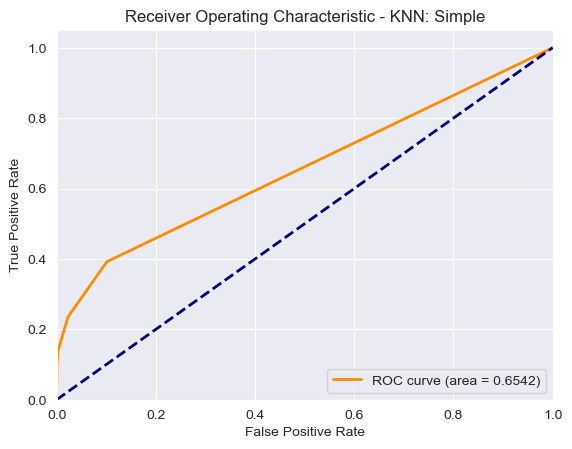

KNN: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.765909 │
├───────────┼──────────┤
│ Precision │ 0.786667 │
├───────────┼──────────┤
│ Recall    │ 0.722818 │
├───────────┼──────────┤
│ F1 score  │ 0.753392 │
├───────────┼──────────┤
│ RMSE      │ 0.483829 │
├───────────┼──────────┤
│ AUC       │ 0.842894 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1078  256]
 [ 362  944]]



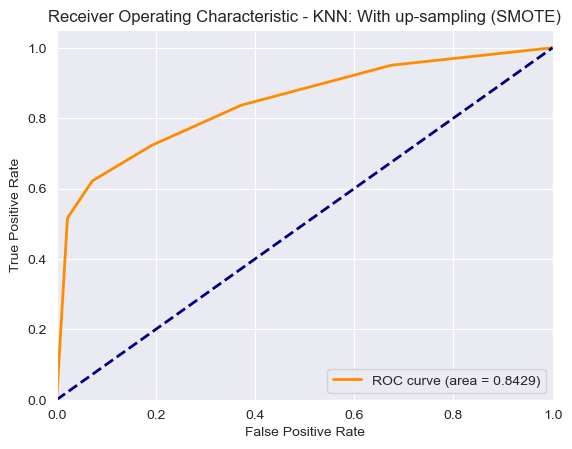

KNN: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.477273 │
├───────────┼──────────┤
│ Precision │ 0.390244 │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.410256 │
├───────────┼──────────┤
│ RMSE      │ 0.722999 │
├───────────┼──────────┤
│ AUC       │ 0.474298 │
╘═══════════╧══════════╛
Confusion Matrix:
[[26 25]
 [21 16]]



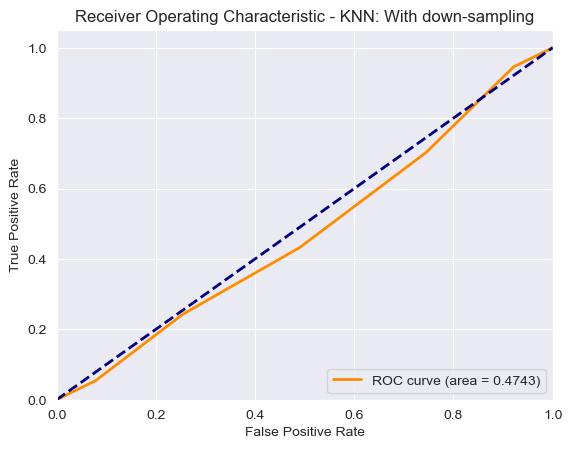

KNN: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.75303  │
├───────────┼──────────┤
│ Precision │ 0.759113 │
├───────────┼──────────┤
│ Recall    │ 0.733538 │
├───────────┼──────────┤
│ F1 score  │ 0.746106 │
├───────────┼──────────┤
│ RMSE      │ 0.49696  │
├───────────┼──────────┤
│ AUC       │ 0.827263 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1030  304]
 [ 348  958]]



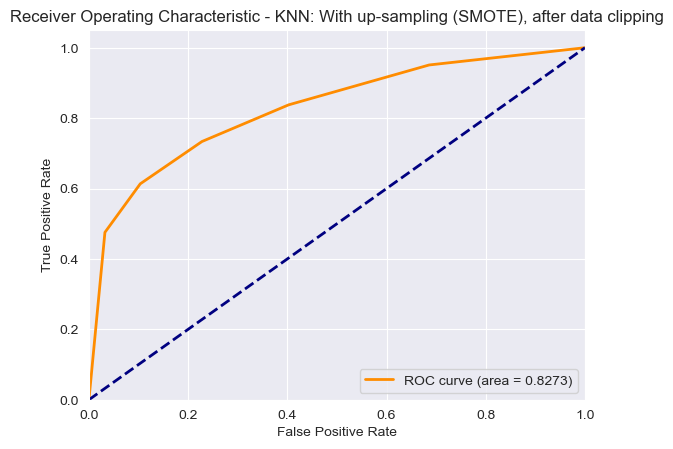

KNN: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.477273 │
├───────────┼──────────┤
│ Precision │ 0.390244 │
├───────────┼──────────┤
│ Recall    │ 0.432432 │
├───────────┼──────────┤
│ F1 score  │ 0.410256 │
├───────────┼──────────┤
│ RMSE      │ 0.722999 │
├───────────┼──────────┤
│ AUC       │ 0.474298 │
╘═══════════╧══════════╛
Confusion Matrix:
[[26 25]
 [21 16]]



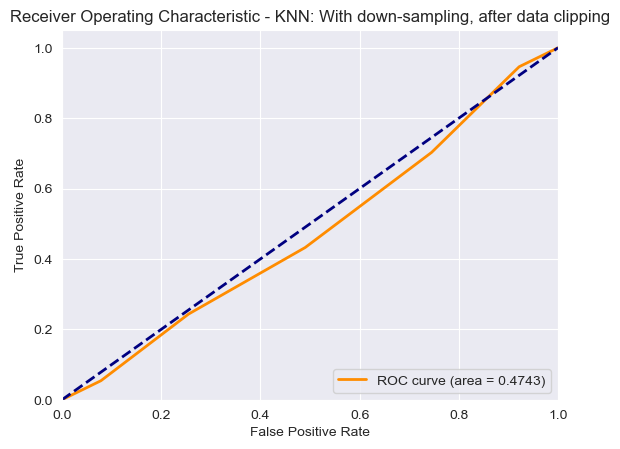

Neural Network: Simple Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.96261   │
├───────────┼───────────┤
│ Precision │ 0.5       │
├───────────┼───────────┤
│ Recall    │ 0.0588235 │
├───────────┼───────────┤
│ F1 score  │ 0.105263  │
├───────────┼───────────┤
│ RMSE      │ 0.193365  │
├───────────┼───────────┤
│ AUC       │ 0.450301  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[1310    3]
 [  48    3]]



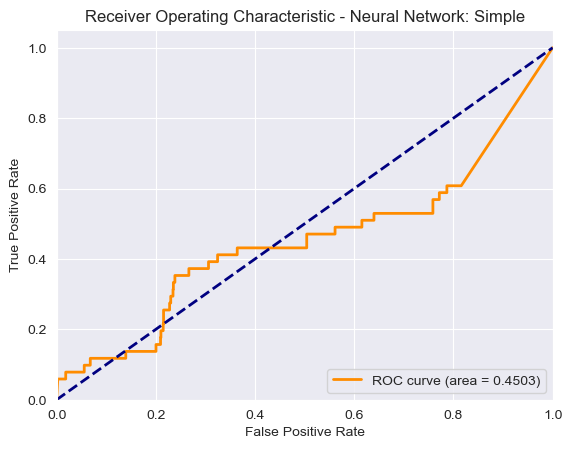

Neural Network: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.563258 │
├───────────┼──────────┤
│ Precision │ 0.869565 │
├───────────┼──────────┤
│ Recall    │ 0.137825 │
├───────────┼──────────┤
│ F1 score  │ 0.237938 │
├───────────┼──────────┤
│ RMSE      │ 0.660865 │
├───────────┼──────────┤
│ AUC       │ 0.50622  │
╘═══════════╧══════════╛
Confusion Matrix:
[[1307   27]
 [1126  180]]



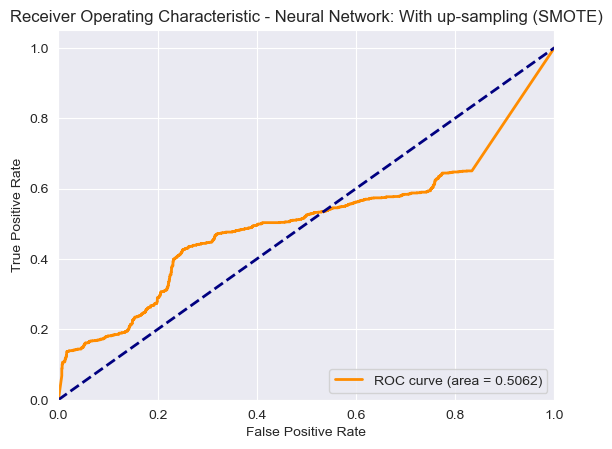

Neural Network: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.420455 │
├───────────┼──────────┤
│ Precision │ 0.420455 │
├───────────┼──────────┤
│ Recall    │ 1        │
├───────────┼──────────┤
│ F1 score  │ 0.592    │
├───────────┼──────────┤
│ RMSE      │ 0.761279 │
├───────────┼──────────┤
│ AUC       │ 0.555379 │
╘═══════════╧══════════╛
Confusion Matrix:
[[ 0 51]
 [ 0 37]]



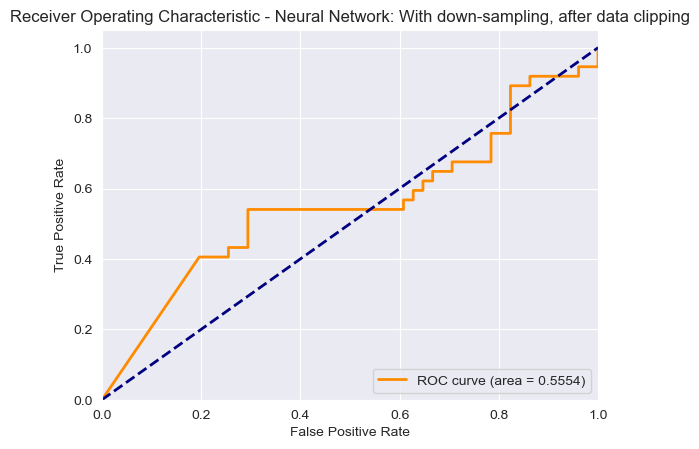

Neural Network: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.555303 │
├───────────┼──────────┤
│ Precision │ 0.645374 │
├───────────┼──────────┤
│ Recall    │ 0.224349 │
├───────────┼──────────┤
│ F1 score  │ 0.332955 │
├───────────┼──────────┤
│ RMSE      │ 0.666856 │
├───────────┼──────────┤
│ AUC       │ 0.531346 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1173  161]
 [1013  293]]



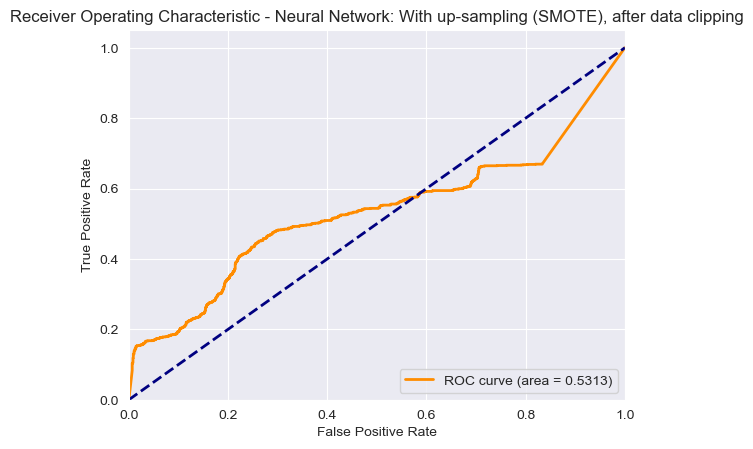

Neural Network: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.375    │
├───────────┼──────────┤
│ Precision │ 0.359375 │
├───────────┼──────────┤
│ Recall    │ 0.621622 │
├───────────┼──────────┤
│ F1 score  │ 0.455446 │
├───────────┼──────────┤
│ RMSE      │ 0.790569 │
├───────────┼──────────┤
│ AUC       │ 0.369899 │
╘═══════════╧══════════╛
Confusion Matrix:
[[10 41]
 [14 23]]



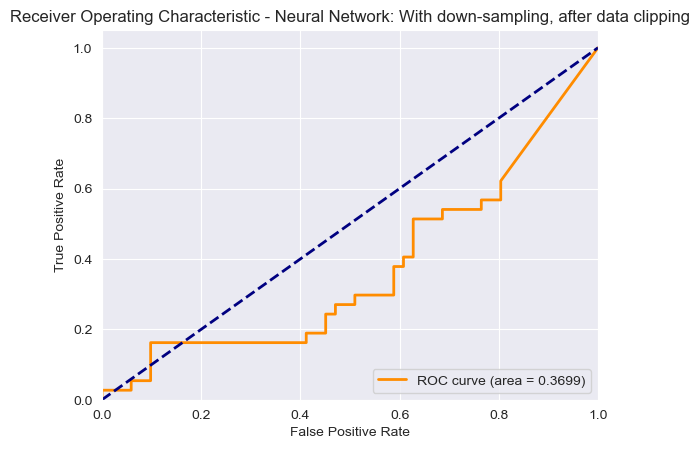

Naive Bayes: Simple Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.0366569 │
├───────────┼───────────┤
│ Precision │ 0.0366838 │
├───────────┼───────────┤
│ Recall    │ 0.980392  │
├───────────┼───────────┤
│ F1 score  │ 0.0707214 │
├───────────┼───────────┤
│ RMSE      │ 0.9815    │
├───────────┼───────────┤
│ AUC       │ 0.648418  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[   0 1313]
 [   1   50]]



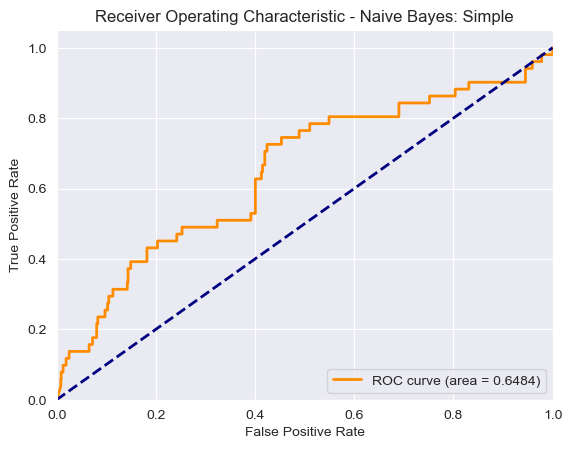

Naive Bayes: With up-sampling (SMOTE) Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.526894  │
├───────────┼───────────┤
│ Precision │ 0.88      │
├───────────┼───────────┤
│ Recall    │ 0.050536  │
├───────────┼───────────┤
│ F1 score  │ 0.0955829 │
├───────────┼───────────┤
│ RMSE      │ 0.687827  │
├───────────┼───────────┤
│ AUC       │ 0.683929  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[1325    9]
 [1240   66]]



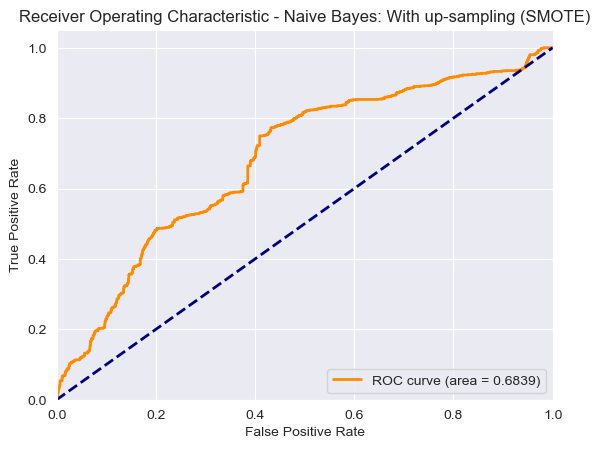

Naive Bayes: With down-sampling Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.590909  │
├───────────┼───────────┤
│ Precision │ 1         │
├───────────┼───────────┤
│ Recall    │ 0.027027  │
├───────────┼───────────┤
│ F1 score  │ 0.0526316 │
├───────────┼───────────┤
│ RMSE      │ 0.639602  │
├───────────┼───────────┤
│ AUC       │ 0.673556  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[51  0]
 [36  1]]



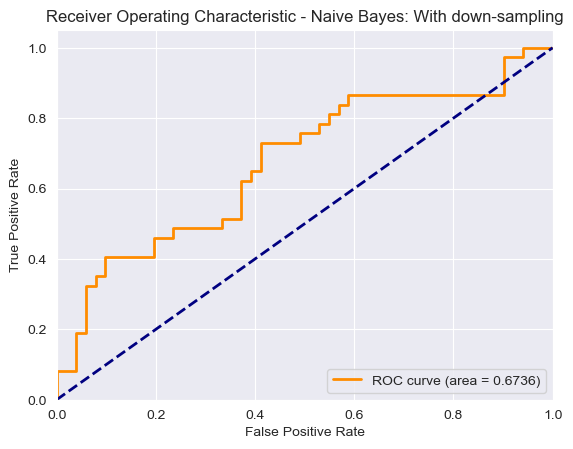

Naive Bayes: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.537879  │
├───────────┼───────────┤
│ Precision │ 0.913462  │
├───────────┼───────────┤
│ Recall    │ 0.0727412 │
├───────────┼───────────┤
│ F1 score  │ 0.134752  │
├───────────┼───────────┤
│ RMSE      │ 0.679795  │
├───────────┼───────────┤
│ AUC       │ 0.67994   │
╘═══════════╧═══════════╛
Confusion Matrix:
[[1325    9]
 [1211   95]]



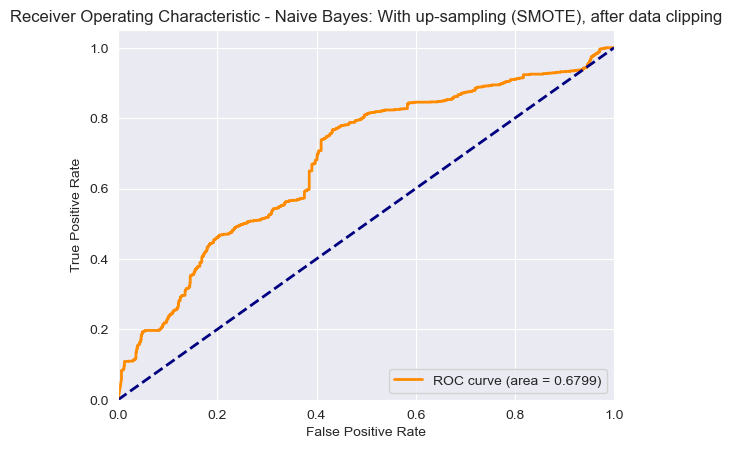

Naive Bayes: With down-sampling, after data clipping Model:
╒═══════════╤═══════════╕
│ Metric    │     Value │
╞═══════════╪═══════════╡
│ Accuracy  │ 0.602273  │
├───────────┼───────────┤
│ Precision │ 1         │
├───────────┼───────────┤
│ Recall    │ 0.0540541 │
├───────────┼───────────┤
│ F1 score  │ 0.102564  │
├───────────┼───────────┤
│ RMSE      │ 0.630656  │
├───────────┼───────────┤
│ AUC       │ 0.678855  │
╘═══════════╧═══════════╛
Confusion Matrix:
[[51  0]
 [35  2]]



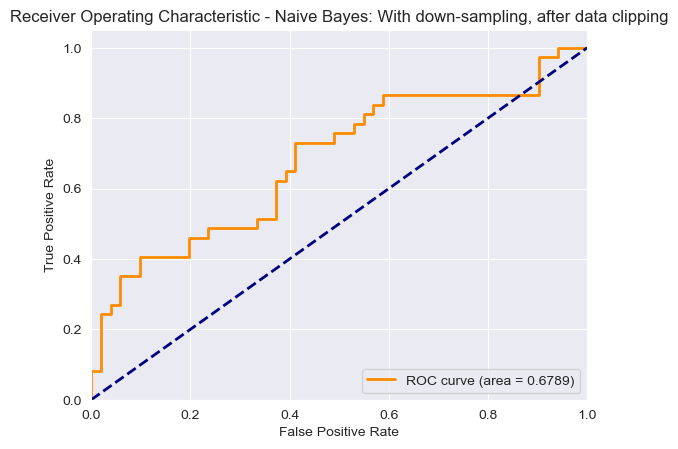

Random Forest: Simple Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.964809 │
├───────────┼──────────┤
│ Precision │ 0.615385 │
├───────────┼──────────┤
│ Recall    │ 0.156863 │
├───────────┼──────────┤
│ F1 score  │ 0.25     │
├───────────┼──────────┤
│ RMSE      │ 0.187592 │
├───────────┼──────────┤
│ AUC       │ 0.919717 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1308    5]
 [  43    8]]



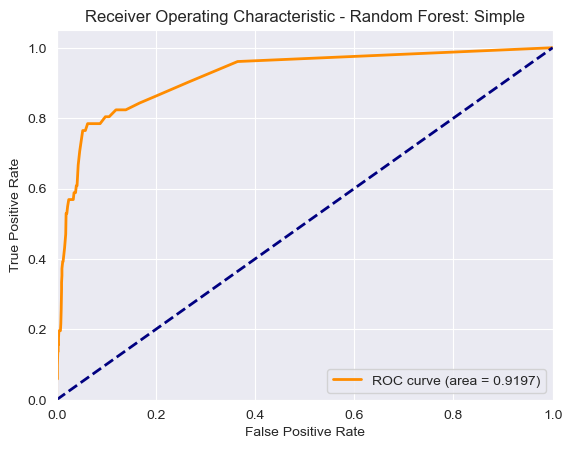

Random Forest: With up-sampling (SMOTE) Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.973106 │
├───────────┼──────────┤
│ Precision │ 0.953711 │
├───────────┼──────────┤
│ Recall    │ 0.993874 │
├───────────┼──────────┤
│ F1 score  │ 0.973378 │
├───────────┼──────────┤
│ RMSE      │ 0.163994 │
├───────────┼──────────┤
│ AUC       │ 0.998195 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1271   63]
 [   8 1298]]



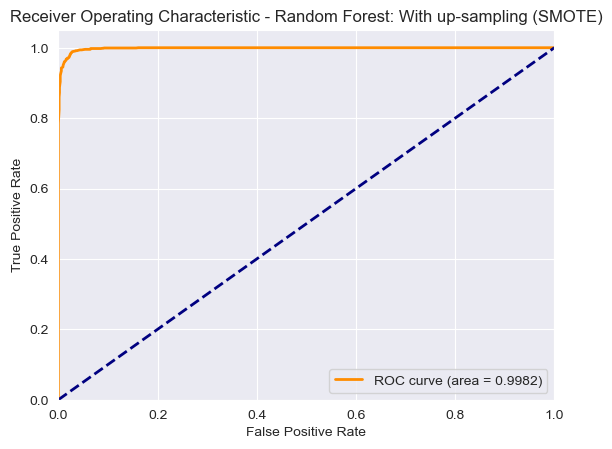

Random Forest: With down-sampling Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.829545 │
├───────────┼──────────┤
│ Precision │ 0.789474 │
├───────────┼──────────┤
│ Recall    │ 0.810811 │
├───────────┼──────────┤
│ F1 score  │ 0.8      │
├───────────┼──────────┤
│ RMSE      │ 0.412861 │
├───────────┼──────────┤
│ AUC       │ 0.90938  │
╘═══════════╧══════════╛
Confusion Matrix:
[[43  8]
 [ 7 30]]



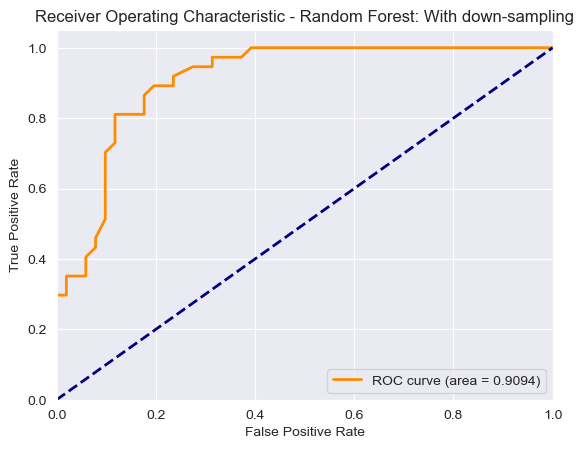

Random Forest: With up-sampling (SMOTE), after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.975758 │
├───────────┼──────────┤
│ Precision │ 0.95932  │
├───────────┼──────────┤
│ Recall    │ 0.993109 │
├───────────┼──────────┤
│ F1 score  │ 0.975922 │
├───────────┼──────────┤
│ RMSE      │ 0.1557   │
├───────────┼──────────┤
│ AUC       │ 0.998279 │
╘═══════════╧══════════╛
Confusion Matrix:
[[1279   55]
 [   9 1297]]



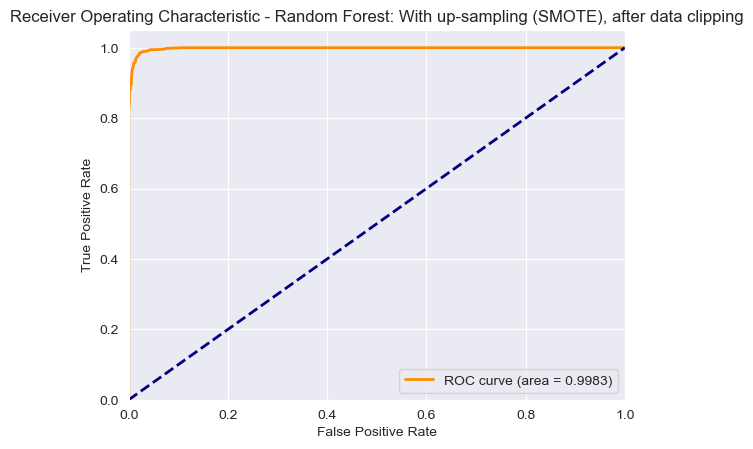

Random Forest: With down-sampling, after data clipping Model:
╒═══════════╤══════════╕
│ Metric    │    Value │
╞═══════════╪══════════╡
│ Accuracy  │ 0.840909 │
├───────────┼──────────┤
│ Precision │ 0.794872 │
├───────────┼──────────┤
│ Recall    │ 0.837838 │
├───────────┼──────────┤
│ F1 score  │ 0.815789 │
├───────────┼──────────┤
│ RMSE      │ 0.398862 │
├───────────┼──────────┤
│ AUC       │ 0.906995 │
╘═══════════╧══════════╛
Confusion Matrix:
[[43  8]
 [ 6 31]]



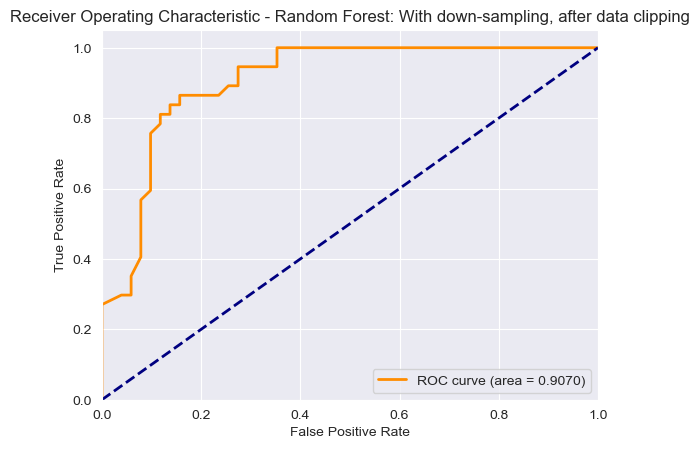

In [194]:
# Evaluate the KNN model
evaluate_model("KNN: Simple", knn_model_1, X_test_1, y_test_1)
evaluate_model("KNN: With up-sampling (SMOTE)", knn_model_2, X_test_2, y_test_2)
evaluate_model("KNN: With down-sampling", knn_model_3, X_test_3, y_test_3)
evaluate_model("KNN: With up-sampling (SMOTE), after data clipping", knn_model_4, X_test_4, y_test_4)
evaluate_model("KNN: With down-sampling, after data clipping", knn_model_3, X_test_3, y_test_3)

# Evaluate the Neural Network model
evaluate_model("Neural Network: Simple", nn_model_1, X_test_1, y_test_1)
evaluate_model("Neural Network: With up-sampling (SMOTE)", nn_model_2, X_test_2, y_test_2)
evaluate_model("Neural Network: With down-sampling, after data clipping", nn_model_3, X_test_3, y_test_3)
evaluate_model("Neural Network: With up-sampling (SMOTE), after data clipping", nn_model_4, X_test_4, y_test_4)
evaluate_model("Neural Network: With down-sampling, after data clipping", nn_model_5, X_test_5, y_test_5)

# # Evaluate the Decision Tree model
# evaluate_model("Decision Tree: Simple", dt_model_1, X_test_1, y_test_1)
# evaluate_model("Decision Tree: With up-sampling (SMOTE)", dt_model_2, X_test_2, y_test_2)
# evaluate_model("Decision Tree: With down-sampling", dt_model_3, X_test_3, y_test_3)
# evaluate_model("Decision Tree: With up-sampling (SMOTE), after data clipping", dt_model_4, X_test_4, y_test_4)
# evaluate_model("Decision Tree: With down-sampling, after data clipping", dt_model_5, X_test_5, y_test_5)

# Evaluate the Naive Bayes model
evaluate_model("Naive Bayes: Simple", nb_model_1, X_test_1, y_test_1)
evaluate_model("Naive Bayes: With up-sampling (SMOTE)", nb_model_2, X_test_2, y_test_2)
evaluate_model("Naive Bayes: With down-sampling", nb_model_3, X_test_3, y_test_3)
evaluate_model("Naive Bayes: With up-sampling (SMOTE), after data clipping", nb_model_4, X_test_4, y_test_4)
evaluate_model("Naive Bayes: With down-sampling, after data clipping", nb_model_5, X_test_5, y_test_5)

# Evaluate the Random Forest model
evaluate_model("Random Forest: Simple", nf_model_1, X_test_1, y_test_1)
evaluate_model("Random Forest: With up-sampling (SMOTE)", nf_model_2, X_test_2, y_test_2)
evaluate_model("Random Forest: With down-sampling", nf_model_3, X_test_3, y_test_3)
evaluate_model("Random Forest: With up-sampling (SMOTE), after data clipping", nf_model_4, X_test_4, y_test_4)
evaluate_model("Random Forest: With down-sampling, after data clipping", nf_model_5, X_test_5, y_test_5)


In [195]:
# Print the table of results
print(results_df)

                                                Model  Accuracy  Precision  \
0                                         KNN: Simple  0.965543   0.700000   
1                       KNN: With up-sampling (SMOTE)  0.765909   0.786667   
2                             KNN: With down-sampling  0.477273   0.390244   
3   KNN: With up-sampling (SMOTE), after data clip...  0.753030   0.759113   
4        KNN: With down-sampling, after data clipping  0.477273   0.390244   
5                              Neural Network: Simple  0.962610   0.500000   
6            Neural Network: With up-sampling (SMOTE)  0.563258   0.869565   
7   Neural Network: With down-sampling, after data...  0.420455   0.420455   
8   Neural Network: With up-sampling (SMOTE), afte...  0.555303   0.645374   
9   Neural Network: With down-sampling, after data...  0.375000   0.359375   
10                                Naive Bayes: Simple  0.036657   0.036684   
11              Naive Bayes: With up-sampling (SMOTE)  0.526894 

In [196]:
results_df.to_csv("model_comparison_results.csv")